<a href="https://colab.research.google.com/github/nikitap60/YBI-Foundation/blob/main/Wine_Quality_Prediction_%5BProject%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# Wine Quality Prediction using support vector machine**

1. Fixed acidity
2. Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfer
8. Density
9. pH
10.Sulphates
11.Alcohol
12.Quality

## Import Library


In [2]:
import pandas as pd

In [3]:
import numpy as np

## Import Dataset

Use URL of file directly


In [4]:
wine = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/WhiteWineQuality.csv', sep=";")

## Get the first five rows of Dataframe

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Get information of Dataframe

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## Get the summary Statistics

In [62]:
wine.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Data Visualozation

In [63]:
# Importing essential libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<ipython-input-64-2e6d9bd60975>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = wine.hist(ax=ax)


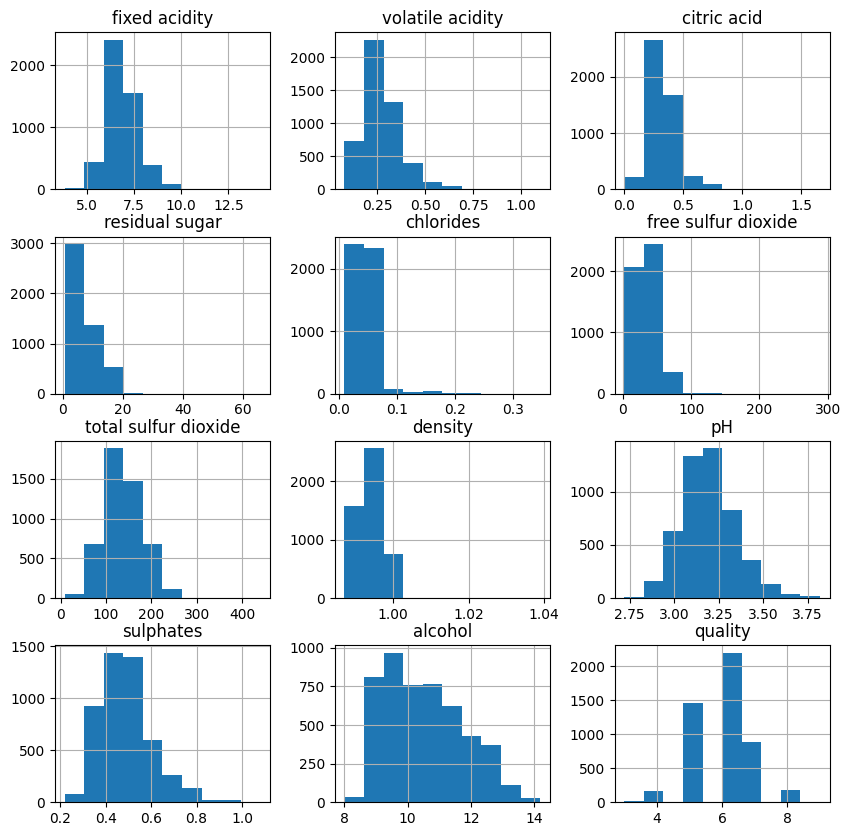

In [64]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
g = wine.hist(ax=ax)

Text(0, 0.5, 'Count')

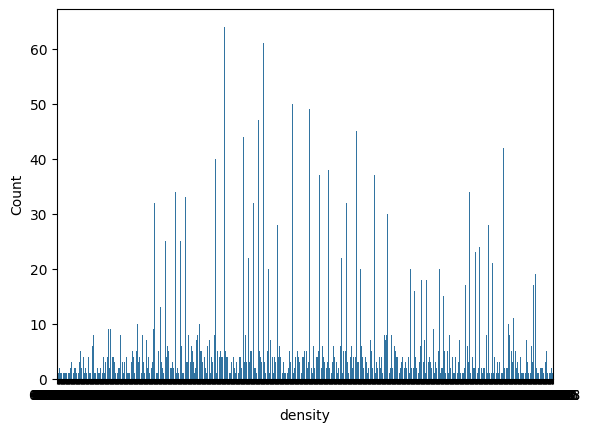

In [68]:
# Visualization to check if the dataset is balanced or not
g = sns.countplot(x='density', data=wine)
plt.xlabel('density')
plt.ylabel('Count')

## Get columns name

In [8]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Get Shape of Dataframe

In [9]:
wine.shape

(4898, 12)

## Get unique values (class or label) in y variable

In [10]:
wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [11]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


## Define y (dependent or label or target variable) and x(independent or features or attribute variable)

In [12]:
y = wine['quality']

In [13]:
y.shape

(4898,)

In [14]:
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [15]:
X = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

### use drop function to define X





In [16]:
X = wine.drop(['quality'], axis=1)

In [17]:
X.shape

(4898, 11)

In [18]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


## Get x variables standarized

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn , they might behave badly if individual do not more or less look like standard normally distributed data : Gaussian with zero mean and unit variance
Next approach is go for Minmax Scaler

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
ss = StandardScaler()

In [21]:
X = ss.fit_transform(X)

In [22]:
X

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

## Get train test split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3, stratify=y , random_state=2529)

In [25]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((3428, 11), (1470, 11), (3428,), (1470,))

## Get model train

In [26]:
from sklearn.svm import SVC

In [27]:
svc = SVC()

In [28]:
svc.fit(X_train , y_train)

SVC()

## Get model prediction

In [29]:
y_pred =svc.predict(X_test)

In [30]:
y_pred.shape

(1470,)

In [31]:
y_pred

array([5, 7, 5, ..., 5, 5, 5])

## Get model evalution

In [32]:
from sklearn.metrics import confusion_matrix , classification_report

In [33]:
print(confusion_matrix(y_test , y_pred))

[[  0   0   1   5   0   0   0]
 [  0   2  25  22   0   0   0]
 [  0   3 273 160   1   0   0]
 [  0   0 122 515  23   0   0]
 [  0   0   6 191  67   0   0]
 [  0   0   0  39  14   0   0]
 [  0   0   0   0   1   0   0]]


In [34]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.40      0.04      0.07        49
           5       0.64      0.62      0.63       437
           6       0.55      0.78      0.65       660
           7       0.63      0.25      0.36       264
           8       0.00      0.00      0.00        53
           9       0.00      0.00      0.00         1

    accuracy                           0.58      1470
   macro avg       0.32      0.24      0.25      1470
weighted avg       0.57      0.58      0.55      1470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Get model Re-run with two class created for wine quality

Wine quality 3,4,5 labelled as 0

Wine quality 6,7,8,9 labelled as 1

In [35]:
y = wine['quality'].apply(lambda y_value: 1 if y_value >=6 else 0)

In [36]:
y.value_counts()

1    3258
0    1640
Name: quality, dtype: int64

## Get train test split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3, stratify=y , random_state=2529)

In [39]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((3428, 11), (1470, 11), (3428,), (1470,))

## Get model train

In [40]:
from sklearn.svm import SVC

In [41]:
svc = SVC()

In [42]:
svc.fit(X_train , y_train)

SVC()

## Get model prediction

In [43]:
y_pred =svc.predict(X_test)

In [44]:
y_pred.shape

(1470,)

In [45]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

## Get model evalution

In [46]:
from sklearn.metrics import confusion_matrix , classification_report

In [47]:
print(confusion_matrix(y_test , y_pred))

[[289 203]
 [124 854]]


In [48]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.70      0.59      0.64       492
           1       0.81      0.87      0.84       978

    accuracy                           0.78      1470
   macro avg       0.75      0.73      0.74      1470
weighted avg       0.77      0.78      0.77      1470



## Get future Prediction

Lets select a random sample from existing dataset as new value

Steps to follow :

1. Extract a random using sample function
2. Separate X and y
3. Standardize X
4. Predict

In [49]:
wine_new = wine.sample(1)

In [50]:
wine_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2787,6.4,0.24,0.25,20.2,0.083,35.0,157.0,0.99976,3.17,0.5,9.1,5


In [51]:
wine_new.shape

(1, 12)

In [52]:
X_new  = wine_new.drop(['quality'], axis=1)

In [53]:
X_new = ss.fit_transform(X_new)

In [54]:
y_pred_new = svc.predict(X_new)

In [55]:
y_pred_new

array([1])